In [9]:
from PIL import Image, ImageDraw, ImageFont
import pytesseract
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import numpy as np
import joblib as jb

In [2]:
def process_image(image_name):
	return pytesseract.pytesseract.image_to_string(image_name, lang="eng", config="-c tessedit_char_whitelist=0123456789.")

# Detect Clock Text

In [11]:
c, s = [], []
for i in range(20, 392):
    im_1 = Image.open(f"/home/shubhamch/project/NetColab/Videos/belgium_traces/P-musher/fr_{str(i).zfill(4)}.png")
    g = process_image(im_1)[:-2]
    c.append(g)
    s.append(len(g))
    # print(generated_text)

In [4]:
c

['198.333\n198.896',
 '198.333\n198.998',
 '198.333\n199.090',
 '198.548\n199.203',
 '198.722\n199.295',
 '198.783\n199.398',
 '198.956\n199.490',
 '199.037\n199.603',
 '199.191\n199.695',
 '199.302\n199.798',
 '199.302\n199.890',
 '199.507\n200.002',
 '199.558\n200.094',
 '199.724\n200.197',
 '199.796\n200.289',
 '199.959\n200.402',
 '200.040\n200.494',
 '200.040\n200.596',
 '200.040\n200.688',
 '200.244\n200.801',
 '200.295\n200.893',
 '200.500\n200.996',
 '200.500\n201.087',
 '200.551\n201.200',
 '200.665\n201.292',
 '200.777\n201.394',
 '200.899\n201.487',
 '201.031\n201.599',
 '201.154\n201.691',
 '201.235\n201.793',
 '201.266\n201.896',
 '201.469\n201.998',
 '201.520\n202.090',
 '201.775\n202.193',
 '201.775\n202.295',
 '201.888\n202.398',
 '201.970\n202.490',
 '202.020\n202.602',
 '202.173\n202.694',
 '202.224\n202.797',
 '202.377\n202.889',
 '202.489\n203.001',
 '202.489\n203.093',
 '202.489\n203.195',
 '202.489\n203.287',
 '202.906\n203.400',
 '202.978\n203.492',
 '202.662\n20

In [32]:
# cc = [i[:-3] for i in c]
# cc
# c

In [34]:
# # for streamed clock only
# j, latency = 0, []
# for i in c:
#     latency.append(float(i) - j)
#     j = float(i)

# cc

In [5]:
# len(c)
latency = []
# for i in cc:
for i in c:
    if "\n" in i:
        o = i.split("\n")
        if len(o) == 2:
            s, r = o[0], o[1]
            # print(s.count("."), r.count("."))
            if (s.count(".") < 2 and " " not in s) and (r.count(".") < 2 and " " not in r):
                latency.append(float(r) - float(s))

In [794]:
# l = np.array(latency)
# jb.dump(latency, "latency_16_0.5s.pkl")
# jb.dump(l, "latency_16_0.25s.pkl")
# l
# c[0][3:]

In [6]:
# np.where(l>2)
# a, b = c[74].split("\n")
# float(b)-float(a)
# l = latency.copy()
# l.pop(74)
# len(l)
# l[74]
# latency[74]
latency = np.array(latency)
latency
# latency[np.where(latency > 0)].shape

array([0.563, 0.665, 0.757, 0.655, 0.573, 0.615, 0.534, 0.566, 0.504,
       0.496, 0.588, 0.495, 0.536, 0.473, 0.493, 0.443, 0.454, 0.556,
       0.648, 0.557, 0.598, 0.496, 0.587, 0.649, 0.627, 0.617, 0.588,
       0.568, 0.537, 0.558, 0.63 , 0.529, 0.57 , 0.418, 0.52 , 0.51 ,
       0.52 , 0.582, 0.521, 0.573, 0.512, 0.512, 0.604, 0.706, 0.798,
       0.494, 0.514, 0.932, 0.993, 0.638, 0.699, 0.546, 0.588, 0.555,
       0.555, 0.505, 0.567, 0.475, 0.507, 0.568, 0.496, 0.516, 0.608,
       0.517, 0.568, 0.477, 0.518, 0.507, 0.488, 0.59 , 0.682, 0.794,
       0.713, 0.735, 0.674, 0.685, 0.613, 0.685, 0.583, 0.604, 0.523,
       0.544, 0.484, 0.382, 0.445, 0.352, 0.363, 0.424, 0.516, 0.629,
       0.505, 0.444, 0.414, 0.527, 0.619, 0.721, 0.813, 0.761, 0.772,
       0.741, 0.711, 0.61 , 0.549, 0.601, 0.611, 0.326, 0.326, 0.796,
       0.816, 0.522, 0.532, 0.482, 0.502, 0.564, 0.471, 0.512, 0.481,
       0.543, 0.554, 0.462, 0.513, 0.372, 0.464, 0.576, 0.668, 0.557,
       0.649, 0.547,

In [7]:
np.mean(latency)

0.5572815789473677

In [10]:
jb.dump(latency, "P-minRTT.pkl")

['P-minRTT.pkl']

In [9]:
# np.mean(latency[np.where(latency > 0)])
# l = list(latency)
# np.mean(l[:194] + l[204:])
# np.mean(latency)
# su = 0
# for ii in range(len(latency)):
#     if ii != 74:
#         su += latency[ii]
# # su = su/(len(latency)-1)
# su = su/(len(latency))
# # type(latency[0])
# su
len(latency)

151

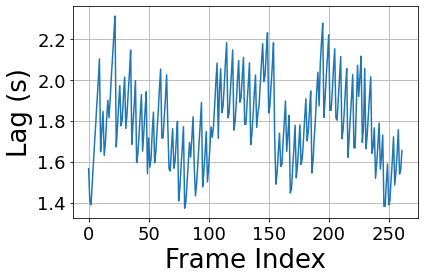

In [12]:
l = list(latency)
# plt.plot(l[:155] + l[175:210] + l[240:])
plt.plot(latency)
# plt.ylim(0, 0.5)
plt.xlabel("Frame Index", fontsize=26)
plt.ylabel("Lag (s)", fontsize=26)
# plt.xticks(range(0, 1601, 400), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.tight_layout()
# plt.show()
plt.savefig("../Plots/SCTP_RTTs/4G/multipath_4G+4G_30fps4F.png", bbox_inches="tight")
# plt.savefig("../Plots/SCTP_RTTs/WiFi/singlepath_4G_30fps4F_test2.png", bbox_inches="tight")

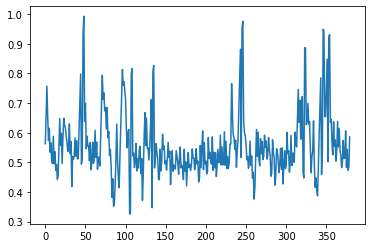

In [8]:
l = list(latency)
# plt.plot(l[:155] + l[175:210] + l[240:])
plt.plot(latency)

In [296]:
# text.text((10, 10), "123456789078934", font=f1, fill=(255))
# text.text((10, 140), "123456789078934", font=f2, fill=(255))

# text.text((10, 10), "788787878787878.6767", font=f1, fill=(255))
# text.text((10, 140), "77777878787878.878787.7878.7878", font=f2, fill=(255))
# text.text((10, 140), "1277777777777777777777", font=f2, fill=(255))
# text.text((10, 140), "888888888888888888888", font=f2, fill=(255))
# text.text((10, 140), "0000000000000000000000000", font=f2, fill=(255))
# img_new

In [29]:
# generated_text = process_image(img_new)
# generated_text
np.mean(l[:1000] + l[1100:1600] + l[1700:])

0.48500029323030286